In [1]:
import pandas as pd
import copy
import numpy as np
%matplotlib inline 

In [2]:
#create dataframe from pnwflights14
flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')
flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       162049 non-null  int64  
 1   month      162049 non-null  int64  
 2   day        162049 non-null  int64  
 3   dep_time   161192 non-null  float64
 4   dep_delay  161192 non-null  float64
 5   arr_time   161061 non-null  float64
 6   arr_delay  160748 non-null  float64
 7   carrier    162049 non-null  object 
 8   tailnum    161801 non-null  object 
 9   flight     162049 non-null  int64  
 10  origin     162049 non-null  object 
 11  dest       162049 non-null  object 
 12  air_time   160748 non-null  float64
 13  distance   162049 non-null  int64  
 14  hour       161192 non-null  float64
 15  minute     161192 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB


In [4]:
#filter to object type
filtered_flights = flights.select_dtypes(include = 'object').copy()
filtered_flights.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


In [5]:
#check values
filtered_flights.isnull().sum()

carrier      0
tailnum    248
origin       0
dest         0
dtype: int64

In [6]:
#fillna
filtered_flights = filtered_flights.fillna(filtered_flights['tailnum'].value_counts().index[0])


In [7]:
#check values again
filtered_flights.isnull().sum()

carrier    0
tailnum    0
origin     0
dest       0
dtype: int64

In [8]:
#frequency distribution
filtered_flights['carrier'].value_counts()

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64

E:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


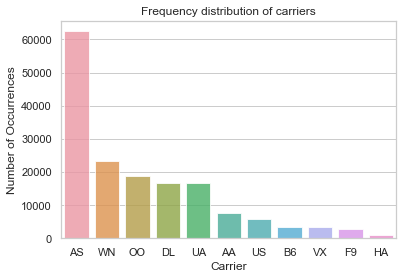

In [9]:
#visualize
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")
sns.barplot(filtered_flights['carrier'].value_counts().index, filtered_flights['carrier'].value_counts().values, alpha = 0.8)
plt.xlabel('Carrier', fontsize = 12)
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.title('Frequency distribution of carriers')
plt.show()

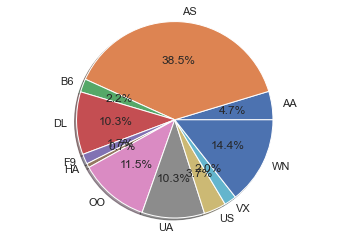

In [10]:
#visualize
counts = filtered_flights['carrier'].value_counts()
labels = filtered_flights['carrier'].astype('category').cat.categories.tolist()
#this line is key
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
#autopct is used to show percentage on plot
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True)
ax1.axis('equal')
plt.show()